In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [0]:
data = pd.read_csv('Ecommerce Customers.csv')

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [13]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

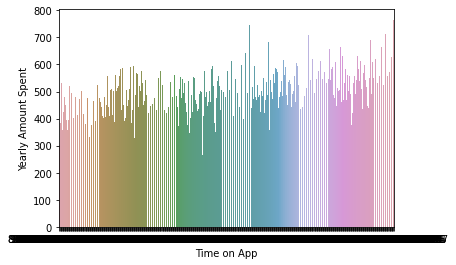

In [28]:
x = data['Time on App']
y = data['Yearly Amount Spent']
sns.barplot(x,y,data=data,dodge=False,saturation=0.5)

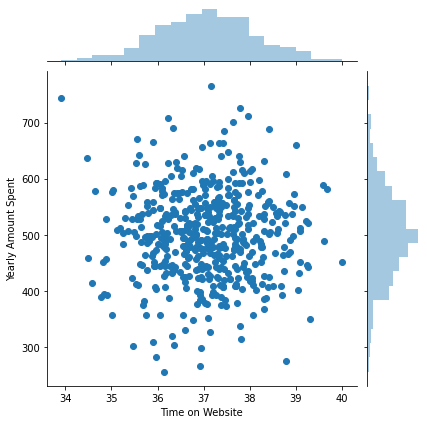

In [26]:
sns.jointplot(data=data,x='Time on Website',y='Yearly Amount Spent')

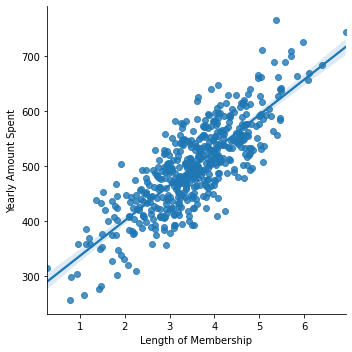

In [27]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data)

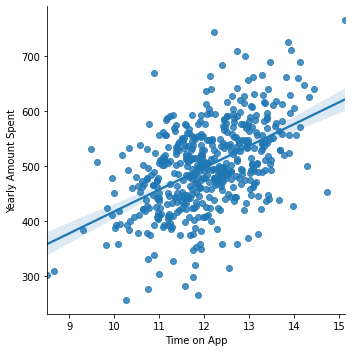

In [29]:
sns.lmplot(x='Time on App',y='Yearly Amount Spent',data=data)

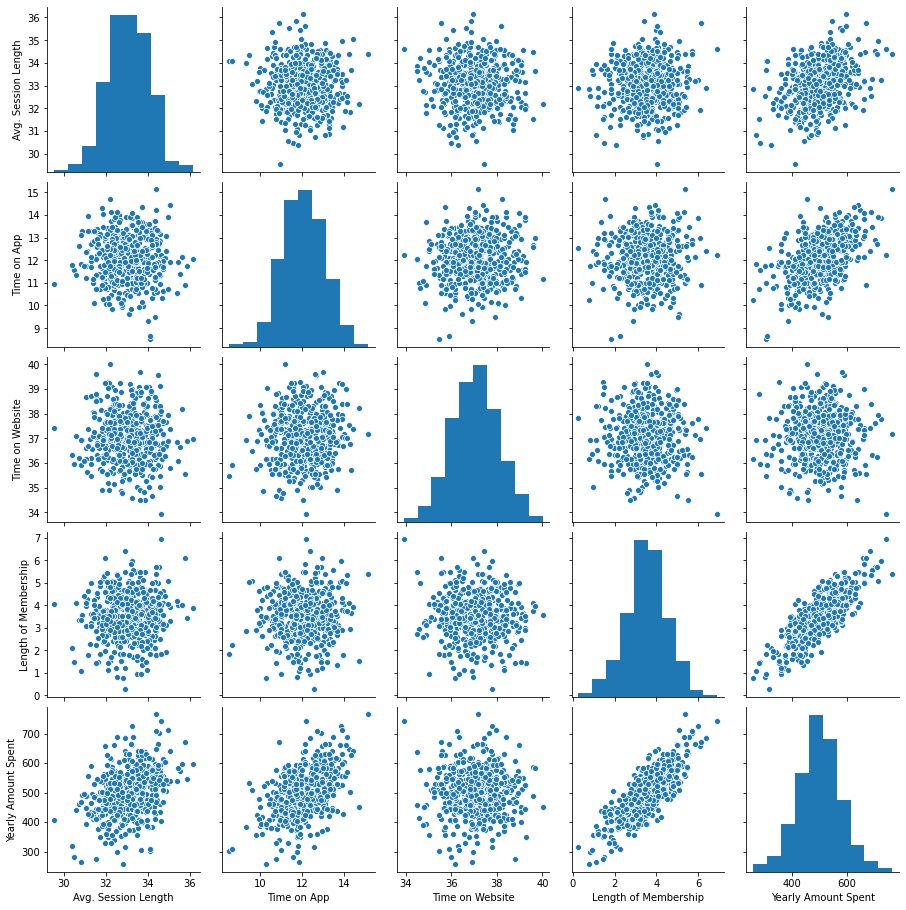

In [30]:
sns.pairplot(data)

In [0]:
X = data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = data['Yearly Amount Spent']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [37]:
X_train.size

1500

In [39]:
X_test.size

500

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()

In [42]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
predict = model.predict(X_test)
predict

array([434.88614252, 507.30113002, 500.43151736, 493.74556225,
       255.12537692, 506.66896628, 380.38497398, 573.33943549,
       483.78345422, 604.22179509, 499.83577289, 411.21340286,
       365.70627759, 583.80130487, 475.39764718, 553.72159335,
       564.42781863, 534.91892764, 441.78464837, 537.97138177,
       418.87083522, 511.42411782, 550.66954883, 531.3030672 ,
       765.40962062, 450.39155547, 456.69419987, 548.55286699,
       413.29881263, 534.67832006, 515.5723177 , 538.05246195,
       692.63201189, 563.37973377, 456.6518873 , 424.8848032 ,
       380.29591922, 331.79315317, 456.1778421 , 284.02398157,
       531.99013299, 702.6957926 , 487.62923073, 526.51854779,
       494.07833236, 478.60915099, 486.3772283 , 388.02614417,
       464.66539292, 549.44865814, 418.18555677, 371.86559229,
       375.18390822, 523.22833481, 487.25691319, 518.04060483,
       577.38490681, 478.29394721, 530.39737264, 572.73619598,
       404.58483902, 400.33458413, 501.76657414, 444.68

In [47]:
model.coef_

array([25.68601975, 38.71837673,  0.45413232, 61.41152176])

In [48]:
model.intercept_

-1050.3415975469538

Text(0, 0.5, 'predicted values')

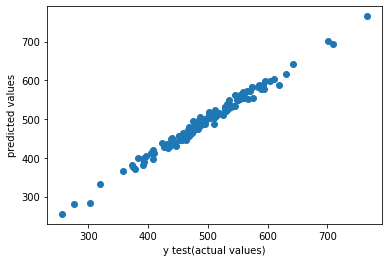

In [49]:
plt.scatter(y_test,predict)
plt.xlabel('y test(actual values)')
plt.ylabel('predicted values')

In [0]:
from sklearn import metrics

In [54]:
print('MAE',metrics.mean_absolute_error(y_test,predict))
print('MSE',metrics.mean_squared_error(y_test,predict))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predict)))

MAE 7.166837137293106
MSE 82.92506172190713
RMSE 9.10631987807957


In [55]:
metrics.explained_variance_score(y_test,predict)

0.9870288141561081

In [67]:
import plotly.figure_factory as ff
x1 = y_test
x2 = predict
hist_data = [x1, x2]
group_labels = ['Actual Value', 'Predicted Value']
fig = ff.create_distplot(hist_data, group_labels, bin_size=.1)
fig.show()